# Comunidad de madrid

In [1]:
import pandas as pd
import sys
import os
import glob
sys.path.append('../src')
import cargadata as cdat
import datetime
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go

In [2]:
contenido = os.listdir('../data/')
contenido

['1_am_ca',
 '2020_meteorologia_cm.zip',
 '2021_meteorologia_cm.zip',
 '2_cm_ca',
 'calidad_aire_estaciones.csv',
 'calidad_aire_estaciones_cm.csv',
 'calidad_aire_zonas_cm_todos_los_municipios_no_.csv',
 'descripcion-fichero-open-data-meteorologico.pdf',
 'ensayo_1',
 'ensayo_10',
 'ensayo_12',
 'ensayo_14',
 'ensayo_20',
 'ensayo_30',
 'ensayo_42',
 'ensayo_44',
 'ensayo_6',
 'ensayo_7',
 'ensayo_8',
 'ensayo_8_.csv',
 'ensayo_9',
 'estaciones.csv',
 'estsciones_cm.json',
 'i',
 'informacion_estaciones_red_calidad_aire__ayunta.csv',
 'informacion_estaciones_red_calidad_aire__ayunta.geo',
 'modificados',
 'spacmzoncalidadair_cm_ZONAS.json',
 'zonas_calidad_aire']

In [3]:
con_a2021 = os.listdir('../data/2_cm_ca/2020')
con_a2021

['2020_01.csv',
 '2020_02.csv',
 '2020_03.csv',
 '2020_04.csv',
 '2020_05.csv',
 '2020_06.csv',
 '2020_07.csv',
 '2020_08.csv',
 '2020_09.csv',
 '2020_10.csv',
 '2020_11.csv',
 '2020_12.csv']

In [4]:
df = pd.read_csv('../data/2_cm_ca/2020/2020_01.csv', sep = ';')

Exploramos el data set suelto

In [5]:
df.head(10)

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,102,1,1,28102001_1_38,2020,1,1,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
1,28,102,1,6,28102001_6_48,2020,1,1,0.3,V,...,0.4,V,0.4,V,0.4,V,0.4,V,0.4,V
2,28,102,1,7,28102001_7_8,2020,1,1,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
3,28,102,1,8,28102001_8_8,2020,1,1,8.0,V,...,8.0,V,8.0,V,9.0,V,10.0,V,8.0,V
4,28,102,1,10,28102001_10_49,2020,1,1,8.0,V,...,16.0,V,16.0,V,17.0,V,17.0,V,17.0,V
5,28,102,1,12,28102001_12_8,2020,1,1,10.0,V,...,10.0,V,10.0,V,11.0,V,12.0,V,10.0,V
6,28,102,1,14,28102001_14_6,2020,1,1,39.0,V,...,52.0,V,50.0,V,42.0,V,41.0,V,39.0,V
7,28,120,1,7,28120001_7_8,2020,1,1,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
8,28,120,1,8,28120001_8_8,2020,1,1,2.0,V,...,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V
9,28,120,1,9,28120001_9_49,2020,1,1,8.0,V,...,1.0,V,1.0,V,2.0,V,2.0,V,1.0,V


Vamos a gestionara los datos marcados como no válidos. si son no validos los voy a igualar al anterior si válido

In [6]:
df[f'v01'].value_counts()

V    4923
N      37
Name: v01, dtype: int64

Pacece que cada columna suel tener alrederor de 20 valores así


Primero voy a convertir estos valores en Nan;

In [7]:
horas = ['01', '02','03','04','05', '06', '07', '08', '09', '10', '11', '12',
         '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']

In [8]:
columns_names = ['provincia', 'municipio', 'estacion', 'magnitud', 'punto_muestreo',
       'year', 'month', 'day', 'h01', 'v01', 'h02', 'v02', 'h03', 'v03', 'h04',
       'v04', 'h05', 'v05', 'h06', 'v06', 'h07', 'v07', 'h08', 'v08', 'h09',
       'v09', 'h10', 'v10', 'h11', 'v11', 'h12', 'v12', 'h13', 'v13', 'h14',
       'v14', 'h15', 'v15', 'h16', 'v16', 'h17', 'v17', 'h18', 'v18', 'h19',
       'v19', 'h20', 'v20', 'h21', 'v21', 'h22', 'v22', 'h23', 'v23', 'h24',
       'v24']

paso a minusculas las colunas 

In [9]:
df.set_axis(columns_names, axis='columns', inplace=True)

In [10]:
df.sample(20)
    

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
2435,28,148,4,9,28148004_9_49,2020,1,16,25.0,V,...,36.0,V,37.0,V,38.0,V,32.0,V,22.0,V
1366,28,47,2,431,28047002_431_59,2020,1,9,0.1,V,...,0.8,V,0.3,V,0.4,V,0.2,V,0.2,V
4799,28,92,5,14,28092005_14_6,2020,1,30,51.0,V,...,51.0,V,54.0,V,58.0,V,61.0,V,63.0,V
2102,28,13,2,14,28013002_14_6,2020,1,14,11.0,V,...,1.0,V,1.0,V,2.0,V,5.0,V,10.0,V
3832,28,9,1,14,28009001_14_6,2020,1,24,62.0,V,...,45.0,V,52.0,V,52.0,V,54.0,V,55.0,V
3928,28,49,3,8,28049003_8_8,2020,1,25,43.0,V,...,62.0,V,53.0,V,50.0,V,47.0,V,41.0,V
1915,28,92,5,7,28092005_7_8,2020,1,12,47.0,V,...,4.0,V,3.0,V,18.0,V,80.0,V,134.0,V
4410,28,49,3,10,28049003_10_49,2020,1,28,13.0,V,...,9.0,V,6.0,V,6.0,V,7.0,V,6.0,V
1200,28,47,2,12,28047002_12_8,2020,1,8,113.0,V,...,333.0,V,320.0,V,384.0,V,312.0,V,281.0,V
4441,28,65,14,7,28065014_7_8,2020,1,28,1.0,V,...,3.0,V,2.0,V,1.0,V,1.0,V,1.0,V


In [11]:
df['estacion'].unique()

array([ 1,  2,  4,  3, 14,  7,  5])

In [12]:
df['municipio'].unique()

array([102, 120, 123,  13, 133,  14, 148,  16, 161, 171, 180,  45,  47,
        49,   5,  58,   6,  65,  67,   7,  74,  80,   9,  92])

In [13]:
len(df['municipio'].unique())

24

In [14]:
df['magnitud'].unique()

array([  1,   6,   7,   8,  10,  12,  14,   9,  20,  30,  42,  44, 431])

# Aqui hacer bucle para comunidad  y ayunta

In [15]:
lista_dropeos = [22, 35, 37, 38, 39, 431]

In [16]:
for i in lista_dropeos:
    indexNames = df[ df['magnitud'] == i ].index
    df.drop(indexNames , inplace=True)

In [17]:
df['magnitud'].unique()

array([ 1,  6,  7,  8, 10, 12, 14,  9, 20, 30, 42, 44])

Aplico la magia de Ester😸🐈🐅🐆🐅 a todas mis columnas

In [18]:
for hora in horas:
    df[f'h{hora}'] = np.where(df[f'v{hora}']=='N', np.nan, df[f'h{hora}'])

Compruebo que efectivamente se ha puesto los nan donde corresponde.

In [19]:
for hora in horas:
    print(f'NaN en columna v{hora} =' ,df[f'v{hora}'].value_counts()[1],f'------->valores nan en la columna h{hora} =',df[f'h{hora}'].isna().sum())
    print()

NaN en columna v01 = 35 ------->valores nan en la columna h01 = 35

NaN en columna v02 = 35 ------->valores nan en la columna h02 = 35

NaN en columna v03 = 34 ------->valores nan en la columna h03 = 34

NaN en columna v04 = 36 ------->valores nan en la columna h04 = 36

NaN en columna v05 = 35 ------->valores nan en la columna h05 = 35

NaN en columna v06 = 41 ------->valores nan en la columna h06 = 41

NaN en columna v07 = 118 ------->valores nan en la columna h07 = 118

NaN en columna v08 = 151 ------->valores nan en la columna h08 = 151

NaN en columna v09 = 141 ------->valores nan en la columna h09 = 141

NaN en columna v10 = 177 ------->valores nan en la columna h10 = 177

NaN en columna v11 = 194 ------->valores nan en la columna h11 = 194

NaN en columna v12 = 199 ------->valores nan en la columna h12 = 199

NaN en columna v13 = 180 ------->valores nan en la columna h13 = 180

NaN en columna v14 = 134 ------->valores nan en la columna h14 = 134

NaN en columna v15 = 89 ------->

In [20]:
df.sample()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
817,28,123,2,14,28123002_14_6,2020,1,6,4.0,V,...,10.0,V,9.0,V,6.0,V,5.0,V,3.0,V


Dropeo las columnas de verificacion

In [21]:
li_v = []
for hora in horas:
    li_v.append(f'v{hora}')    
li_v

['v01',
 'v02',
 'v03',
 'v04',
 'v05',
 'v06',
 'v07',
 'v08',
 'v09',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24']

In [22]:
df.drop(li_v, axis = 1, inplace=True)

In [23]:
df.sample()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,h01,h02,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
2758,28,148,4,14,28148004_14_6,2020,1,18,5.0,4.0,...,39.0,30.0,30.0,44.0,35.0,28.0,40.0,13.0,15.0,37.0


Aplico el valor anterior inmediatamente válido con un método de propagacion de ffill  

In [24]:
# for hora in horas:
#    print(df[f'h{hora}'].isna().sum())

In [25]:
df.fillna(method='ffill', inplace=True)

In [26]:
# for hora in horas:
#     print(df[f'h{hora}'].isna().sum())

In [27]:
df.magnitud.unique()

array([ 1,  6,  7,  8, 10, 12, 14,  9, 20, 30, 42, 44])

In [28]:
len(df.magnitud.unique())

12

In [29]:
len(df.estacion.unique())

7

In [30]:
li_h = []
for hora in horas:
    li_h.append(f'h{hora}')  
li_h;

In [31]:
df.columns

Index(['provincia', 'municipio', 'estacion', 'magnitud', 'punto_muestreo',
       'year', 'month', 'day', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07',
       'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17',
       'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24'],
      dtype='object')

In [32]:
df_melt = df.melt(['provincia', 'municipio', 'estacion', 'magnitud', 'punto_muestreo',
       'year', 'month', 'day']) 
df_melt.sample()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,variable,value
64422,28,92,5,6,28092005_6_48,2020,1,10,h14,0.6


In [33]:
df_melt.rename(columns = {'variable':'hour'}, inplace = True)

In [34]:
df_melt.head(2)

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,hour,value
0,28,102,1,1,28102001_1_38,2020,1,1,h01,1.0
1,28,102,1,6,28102001_6_48,2020,1,1,h01,0.3


In [35]:
li_h; 

In [36]:
horas = [int(x[1:]) for x in li_h]
horas;

In [37]:
dic_horas = dict(zip(li_h, horas))

In [38]:
dic_horas;

In [39]:
df_melt['hour']= df_melt['hour'].map(dic_horas)

In [40]:
df_melt.tail()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,hour,value
116059,28,92,5,7,28092005_7_8,2020,1,31,24,1.0
116060,28,92,5,8,28092005_8_8,2020,1,31,24,6.0
116061,28,92,5,10,28092005_10_49,2020,1,31,24,10.0
116062,28,92,5,12,28092005_12_8,2020,1,31,24,8.0
116063,28,92,5,14,28092005_14_6,2020,1,31,24,46.0


In [41]:
df_melt['miDt']=pd.to_datetime(df_melt[['year','month','day','hour']])

In [42]:
df_melt.sample()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,hour,value,miDt
9092,28,16,1,10,28016001_10_49,2020,1,28,2,5.0,2020-01-28 02:00:00


In [43]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116064 entries, 0 to 116063
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   provincia       116064 non-null  int64         
 1   municipio       116064 non-null  int64         
 2   estacion        116064 non-null  int64         
 3   magnitud        116064 non-null  int64         
 4   punto_muestreo  116064 non-null  object        
 5   year            116064 non-null  int64         
 6   month           116064 non-null  int64         
 7   day             116064 non-null  int64         
 8   hour            116064 non-null  int64         
 9   value           116064 non-null  float64       
 10  miDt            116064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 9.7+ MB


In [44]:
28005002 5 ALCALÁ DE HENARES
28006004 6 ALCOBENDAS
28007004 7 ALCORCÓN
28009001 9 ALGETE
28013002 13 ARANJUEZ
28014002 14 ARGANDA DEL REY
28016001 16 EL ATAZAR
28045002 45 COLMENAR VIEJO
28047002 47 COLLADO VILLALBA
28049003 49 COSLADA
28058004 58 FUENLABRADA
28065014 65 GETAFE
28067001 67 GUADALIX DE LA SIERRA
28074007 74 LEGANÉS
28080003 80 MAJADAHONDA
28092005 92 MÓSTOLES
28102001 102 ORUSCO DE TAJUÑA
28120001 120 PUERTO DE COTOS
28123002 123 RIVAS-VACIAMADRID
28133002 133 SAN MARTÍN DE VALDEIGLESIAS
28148004 148 TORREJÓN DE ARDOZ
28161001 161 VALDEMORO
28171001 171 VILLA DEL PRADO
28180001 180 VILLAREJO DE SALVANÉS

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1431200206.py, line 1)

In [45]:
df_melt.sample()

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,hour,value,miDt
33256,28,14,2,7,28014002_7_8,2020,1,28,7,3.0,2020-01-28 07:00:00


In [46]:
df_melt['punto_muestreo']=df_melt['punto_muestreo'].apply([lambda x: x[:8]])

In [47]:
df_melt

,provincia,municipio,estacion,magnitud,punto_muestreo,year,month,day,hour,value,miDt
0,28,102,1,1,28102001,2020,1,1,1,1.0,2020-01-01 01:00:00
1,28,102,1,6,28102001,2020,1,1,1,0.3,2020-01-01 01:00:00
2,28,102,1,7,28102001,2020,1,1,1,1.0,2020-01-01 01:00:00
3,28,102,1,8,28102001,2020,1,1,1,8.0,2020-01-01 01:00:00
4,28,102,1,10,28102001,2020,1,1,1,8.0,2020-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...
116059,28,92,5,7,28092005,2020,1,31,24,1.0,2020-02-01 00:00:00
116060,28,92,5,8,28092005,2020,1,31,24,6.0,2020-02-01 00:00:00
116061,28,92,5,10,28092005,2020,1,31,24,10.0,2020-02-01 00:00:00
116062,28,92,5,12,28092005,2020,1,31,24,8.0,2020-02-01 00:00:00


In [48]:
df_melt.drop(['provincia','year','month','day','hour', 'municipio', 'estacion'], axis = 1, inplace=True)

In [49]:
df_melt.sample()

,magnitud,punto_muestreo,value,miDt
97151,9,28065014,26.0,2020-01-03 21:00:00


In [50]:
df_melt = df_melt.iloc[:,[3,1,0,2]]

In [51]:
df_melt.head(5)

,miDt,punto_muestreo,magnitud,value
0,2020-01-01 01:00:00,28102001,1,1.0
1,2020-01-01 01:00:00,28102001,6,0.3
2,2020-01-01 01:00:00,28102001,7,1.0
3,2020-01-01 01:00:00,28102001,8,8.0
4,2020-01-01 01:00:00,28102001,10,8.0


In [52]:
df_melt['magnitud'].unique()

array([ 1,  6,  7,  8, 10, 12, 14,  9, 20, 30, 42, 44])

In [53]:
df_melt['punto_muestreo'].unique()

array(['28102001', '28120001', '28123002', '28013002', '28133002',
       '28014002', '28148004', '28016001', '28161001', '28171001',
       '28180001', '28045002', '28047002', '28049003', '28005002',
       '28058004', '28006004', '28065014', '28067001', '28007004',
       '28074007', '28080003', '28009001', '28092005'], dtype=object)

In [54]:
len(df_melt['punto_muestreo'].unique())

24

In [55]:
df_total = pd.pivot_table(data=df_melt,
               index=['miDt', 'punto_muestreo'],
               columns=['magnitud']
              )

In [56]:
df_total.head(30)

value                                   \
magnitud                              1    6      7      8      9      10   
miDt                punto_muestreo                                          
2020-01-01 01:00:00 28005002         1.0  0.9  100.0   47.0   46.0   74.0   
                    28006004         NaN  NaN  135.0   58.0    NaN   64.0   
                    28007004         NaN  NaN  137.0   59.0  264.0    NaN   
                    28009001         NaN  NaN   17.0   26.0   36.0    NaN   
                    28013002         NaN  NaN   12.0   15.0    NaN   38.0   
                    28014002         NaN  NaN   30.0   25.0    NaN   62.0   
                    28016001         1.0  0.5    1.0    5.0    1.0    1.0   
                    28045002         NaN  1.5  179.0  103.0    NaN   68.0   
                    28047002         4.0  NaN  145.0   55.0   79.0    NaN   
                    28049003         NaN  NaN    0.1    0.1    0.1    0.1   
                    28058004         NaN  NaN  141.0   85.0    NaN   85.0   
                    28065014         NaN  NaN  273.0   82.0   82.0  272.0   
                    28067001         NaN  NaN   25.0   27.0    NaN   25.0   
                    28074007         NaN  NaN  189.0   69.0   53.0   73.0   
                    28080003         NaN  NaN   68.0   67.0    NaN   53.0   
                    28092005         2.0  1.1   97.0   47.0    NaN  125.0   
                    28102001         1.0  0.3    1.0    8.0    NaN    8.0   
                    28120001         NaN  NaN    1.0    2.0    8.0    2.0   
                    28123002         NaN  NaN  111.0   54.0    NaN   97.0   
                    28133002         NaN  NaN   15.0   25.0    NaN   50.0   
                    28148004         NaN  NaN   48.0   42.0   42.0   42.0   
                    28161001         NaN  NaN   98.0   31.0  107.0    NaN   
                    28171001         1.0  0.8    1.0   16.0   17.0   23.0   
                    28180001         NaN  NaN  101.0   38.0   95.0    NaN   
2020-01-01 02:00:00 28005002         2.0  0.8   98.0   50.0   41.0   71.0   
                    28006004         NaN  NaN  119.0   57.0    NaN   85.0   
                    28007004         NaN  NaN  109.0   71.0  177.0    NaN   
                    28009001         NaN  NaN   17.0   25.0   41.0    NaN   
                    28013002         NaN  NaN    5.0   11.0    NaN   33.0   
                    28014002         NaN  NaN   39.0   27.0    NaN   56.0   

                                                                      
magnitud                               12    14    20   30   42   44  
miDt                punto_muestreo                                    
2020-01-01 01:00:00 28005002        199.0   1.0   NaN  NaN  NaN  NaN  
                    28006004        264.0   3.0  15.1  2.5  2.3  0.4  
                    28007004        268.0   1.0   NaN  NaN  NaN  NaN  
                    28009001         52.0   8.0   NaN  NaN  NaN  NaN  
                    28013002         33.0   2.0   NaN  NaN  NaN  NaN  
                    28014002         71.0   2.0   NaN  NaN  NaN  NaN  
                    28016001          7.0  63.0   0.1  0.2  1.3  0.1  
                    28045002        378.0   2.0   NaN  NaN  NaN  NaN  
                    28047002        277.0   4.0   7.0  4.6  1.7  0.1  
                    28049003          0.1   0.1   NaN  NaN  NaN  NaN  
                    28058004        301.0   3.0   5.7  3.1  1.9  0.3  
                    28065014        501.0   3.0   NaN  NaN  NaN  NaN  
                    28067001         65.0   6.0   NaN  NaN  NaN  NaN  
                    28074007        359.0   1.0   NaN  NaN  NaN  NaN  
                    28080003        172.0   1.0   NaN  NaN  NaN  NaN  
                    28092005        195.0   5.0   NaN  NaN  NaN  NaN  
                    28102001         10.0  39.0   NaN  NaN  NaN  NaN  
                    28120001          4.0  82.0   NaN  NaN  NaN  NaN  
  

In [57]:
df_total.columns


MultiIndex([('value',  1),
            ('value',  6),
            ('value',  7),
            ('value',  8),
            ('value',  9),
            ('value', 10),
            ('value', 12),
            ('value', 14),
            ('value', 20),
            ('value', 30),
            ('value', 42),
            ('value', 44)],
           names=[None, 'magnitud'])

In [58]:
multi_col = df_total.columns

In [59]:
new_col = pd.Index(['ensayo_' + str(e[1]) for e in multi_col.tolist()])

In [60]:
new_col

Index(['ensayo_1', 'ensayo_6', 'ensayo_7', 'ensayo_8', 'ensayo_9', 'ensayo_10',
       'ensayo_12', 'ensayo_14', 'ensayo_20', 'ensayo_30', 'ensayo_42',
       'ensayo_44'],
      dtype='object')

In [61]:
df_total.columns = new_col

In [62]:
df_total.head(30)

ensayo_1  ensayo_6  ensayo_7  ensayo_8  \
miDt                punto_muestreo                                           
2020-01-01 01:00:00 28005002             1.0       0.9     100.0      47.0   
                    28006004             NaN       NaN     135.0      58.0   
                    28007004             NaN       NaN     137.0      59.0   
                    28009001             NaN       NaN      17.0      26.0   
                    28013002             NaN       NaN      12.0      15.0   
                    28014002             NaN       NaN      30.0      25.0   
                    28016001             1.0       0.5       1.0       5.0   
                    28045002             NaN       1.5     179.0     103.0   
                    28047002             4.0       NaN     145.0      55.0   
                    28049003             NaN       NaN       0.1       0.1   
                    28058004             NaN       NaN     141.0      85.0   
                    28065014             NaN       NaN     273.0      82.0   
                    28067001             NaN       NaN      25.0      27.0   
                    28074007             NaN       NaN     189.0      69.0   
                    28080003             NaN       NaN      68.0      67.0   
                    28092005             2.0       1.1      97.0      47.0   
                    28102001             1.0       0.3       1.0       8.0   
                    28120001             NaN       NaN       1.0       2.0   
                    28123002             NaN       NaN     111.0      54.0   
                    28133002             NaN       NaN      15.0      25.0   
                    28148004             NaN       NaN      48.0      42.0   
                    28161001             NaN       NaN      98.0      31.0   
                    28171001             1.0       0.8       1.0      16.0   
                    28180001             NaN       NaN     101.0      38.0   
2020-01-01 02:00:00 28005002             2.0       0.8      98.0      50.0   
                    28006004             NaN       NaN     119.0      57.0   
                    28007004             NaN       NaN     109.0      71.0   
                    28009001             NaN       NaN      17.0      25.0   
                    28013002             NaN       NaN       5.0      11.0   
                    28014002             NaN       NaN      39.0      27.0   

                                    ensayo_9  ensayo_10  ensayo_12  ensayo_14  \
miDt                punto_muestreo                                              
2020-01-01 01:00:00 28005002            46.0       74.0      199.0        1.0   
                    28006004             NaN       64.0      264.0        3.0   
                    28007004           264.0        NaN      268.0        1.0   
                    28009001            36.0        NaN       52.0        8.0   
                    28013002             NaN       38.0       33.0        2.0   
                    28014002             NaN       62.0       71.0        2.0   
                    28016001             1.0        1.0        7.0       63.0   
                    28045002             NaN       68.0      378.0        2.0   
                    28047002            79.0        NaN      277.0        4.0   
                    28049003             0.1        0.1        0.1        0.1   
                    28058004             NaN       85.0      301.0        3.0   
                    28065014            82.0      272.0      501.0        3.0   
                    28067001             NaN       25.0       65.0        6.0   
                    28074007            53.0       73.0      359.0        1.0   
                    28080003             NaN       53.0      172.0        1.0   
                    28092005             NaN      125.0      195.0        5.0   
                    28102001             NaN        8.0       10.0       39.0   


## Aqui abro nueva via para continuar la exploración al final del documento. 

In [63]:
df_ens = df_total.copy()

In [64]:
df_ens.head()

ensayo_1  ensayo_6  ensayo_7  ensayo_8  \
miDt                punto_muestreo                                           
2020-01-01 01:00:00 28005002             1.0       0.9     100.0      47.0   
                    28006004             NaN       NaN     135.0      58.0   
                    28007004             NaN       NaN     137.0      59.0   
                    28009001             NaN       NaN      17.0      26.0   
                    28013002             NaN       NaN      12.0      15.0   

                                    ensayo_9  ensayo_10  ensayo_12  ensayo_14  \
miDt                punto_muestreo                                              
2020-01-01 01:00:00 28005002            46.0       74.0      199.0        1.0   
                    28006004             NaN       64.0      264.0        3.0   
                    28007004           264.0        NaN      268.0        1.0   
                    28009001            36.0        NaN       52.0        8.0   
                    28013002             NaN       38.0       33.0        2.0   

                                    ensayo_20  ensayo_30  ensayo_42  ensayo_44  
miDt                punto_muestreo                                              
2020-01-01 01:00:00 28005002              NaN        NaN        NaN        NaN  
                    28006004             15.1        2.5        2.3        0.4  
                    28007004              NaN        NaN        NaN        NaN  
                    28009001              NaN        NaN        NaN        NaN  
                    28013002              NaN        NaN        NaN        NaN

## continua al final del documento. 

In [65]:
df_total = pd.pivot_table(data=df_total,
               index=['miDt'],
               columns=['punto_muestreo']
              )

In [66]:
df_total.head(30)

ensayo_1                                               \
punto_muestreo      28005002 28016001 28047002 28092005 28102001 28171001   
miDt                                                                        
2020-01-01 01:00:00      1.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 02:00:00      2.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 03:00:00      1.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 04:00:00      1.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 05:00:00      1.0      1.0      4.0      1.0      1.0      1.0   
2020-01-01 06:00:00      1.0      1.0      4.0      1.0      1.0      1.0   
2020-01-01 07:00:00      1.0      1.0      3.0      1.0      1.0      1.0   
2020-01-01 08:00:00      1.0      1.0      4.0      1.0      1.0      1.0   
2020-01-01 09:00:00      1.0      1.0      3.0      1.0      1.0      1.0   
2020-01-01 10:00:00      2.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 11:00:00      3.0      1.0      3.0      2.0      1.0      1.0   
2020-01-01 12:00:00      5.0      1.0      3.0      3.0      1.0      1.0   
2020-01-01 13:00:00      5.0      1.0      3.0      3.0      1.0      1.0   
2020-01-01 14:00:00      4.0      1.0      3.0      2.0      1.0      1.0   
2020-01-01 15:00:00      3.0      1.0      3.0      1.0      1.0      1.0   
2020-01-01 16:00:00      2.0      1.0      4.0      1.0      1.0      1.0   
2020-01-01 17:00:00      3.0      1.0      4.0      1.0      1.0      1.0   
2020-01-01 18:00:00      2.0      1.0      4.0      1.0      1.0      1.0   
2020-01-01 19:00:00      3.0      1.0      4.0      1.0      1.0      1.0   
2020-01-01 20:00:00      3.0      1.0      4.0      1.0      1.0      1.0   
2020-01-01 21:00:00      3.0      1.0      5.0      1.0      1.0      1.0   
2020-01-01 22:00:00      3.0      1.0      4.0      1.0      1.0      1.0   
2020-01-01 23:00:00      2.0      1.0      4.0      2.0      1.0      1.0   
2020-01-02 00:00:00      1.0      1.0      3.0      1.0      1.0      1.0   
2020-01-02 01:00:00      1.0      1.0      3.0      1.0      1.0      1.0   
2020-01-02 02:00:00      1.0      1.0      3.0      1.0      1.0      1.0   
2020-01-02 03:00:00      1.0      1.0      3.0      1.0      1.0      1.0   
2020-01-02 04:00:00      1.0      1.0      3.0      1.0      1.0      1.0   
2020-01-02 05:00:00      1.0      1.0      3.0      1.0      1.0      1.0   
2020-01-02 06:00:00      1.0      1.0      4.0      2.0      1.0      1.0   

                    ensayo_10                             ... ensayo_9  \
punto_muestreo       28005002 28006004 28013002 28014002  ... 28016001   
miDt                                                      ...            
2020-01-01 01:00:00      74.0     64.0     38.0     62.0  ...      1.0   
2020-01-01 02:00:00      71.0     85.0     33.0     56.0  ...      3.0   
2020-01-01 03:00:00      56.0     81.0     26.0     57.0  ...      4.0   
2020-01-01 04:00:00      44.0     61.0     25.0     55.0  ...      2.0   
2020-01-01 05:00:00      35.0     51.0     24.0     47.0  ...      2.0   
2020-01-01 06:00:00      26.0     52.0     22.0     44.0  ...      3.0   
2020-01-01 07:00:00      25.0     44.0     21.0     39.0  ...      4.0   
2020-01-01 08:00:00      22.0     38.0     11.0     30.0  ...      5.0   
2020-01-01 09:00:00      18.0     26.0      9.0     36.0  ...      6.0   
2020-01-01 10:00:00      12.0     35.0     10.0     50.0  ...      6.0   
2020-01-01 11:00:00       8.0     23.0     22.0     27.0  ...      4.0   
2020-01-01 12:00:00       9.0     18.0     18.0     18.0  ...      8.0   
2020-01-01 13:00:00      10.0     28.0     12.0     18.0  ...      9.0   
2020-01-01 14:00:00      10.0     21.0     11.0     19.0  ...      8.0   
2020-01-01 15:00:00      12.0     22.0     14.0     26.0  ...      4.0   
2020-01-01 16:00:00      19.0     24.0     17.0     27.0  ...      2.0   
2020-01-01 17:00:00      23.0     34.0     28.0     31.0  ...      6.0  

In [67]:
df_total.shape

(744, 156)

In [68]:
df_total.columns

MultiIndex([( 'ensayo_1', '28005002'),
            ( 'ensayo_1', '28016001'),
            ( 'ensayo_1', '28047002'),
            ( 'ensayo_1', '28092005'),
            ( 'ensayo_1', '28102001'),
            ( 'ensayo_1', '28171001'),
            ('ensayo_10', '28005002'),
            ('ensayo_10', '28006004'),
            ('ensayo_10', '28013002'),
            ('ensayo_10', '28014002'),
            ...
            ( 'ensayo_9', '28016001'),
            ( 'ensayo_9', '28047002'),
            ( 'ensayo_9', '28049003'),
            ( 'ensayo_9', '28065014'),
            ( 'ensayo_9', '28074007'),
            ( 'ensayo_9', '28120001'),
            ( 'ensayo_9', '28148004'),
            ( 'ensayo_9', '28161001'),
            ( 'ensayo_9', '28171001'),
            ( 'ensayo_9', '28180001')],
           names=[None, 'punto_muestreo'], length=156)

In [69]:
df_total.index

DatetimeIndex(['2020-01-01 01:00:00', '2020-01-01 02:00:00',
               '2020-01-01 03:00:00', '2020-01-01 04:00:00',
               '2020-01-01 05:00:00', '2020-01-01 06:00:00',
               '2020-01-01 07:00:00', '2020-01-01 08:00:00',
               '2020-01-01 09:00:00', '2020-01-01 10:00:00',
               ...
               '2020-01-31 15:00:00', '2020-01-31 16:00:00',
               '2020-01-31 17:00:00', '2020-01-31 18:00:00',
               '2020-01-31 19:00:00', '2020-01-31 20:00:00',
               '2020-01-31 21:00:00', '2020-01-31 22:00:00',
               '2020-01-31 23:00:00', '2020-02-01 00:00:00'],
              dtype='datetime64[ns]', name='miDt', length=744, freq=None)

In [70]:
df1 = df_total.copy()

In [71]:
df1

ensayo_1                                               \
punto_muestreo      28005002 28016001 28047002 28092005 28102001 28171001   
miDt                                                                        
2020-01-01 01:00:00      1.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 02:00:00      2.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 03:00:00      1.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 04:00:00      1.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 05:00:00      1.0      1.0      4.0      1.0      1.0      1.0   
...                      ...      ...      ...      ...      ...      ...   
2020-01-31 20:00:00      1.0      1.0      1.0      1.0      1.0      1.0   
2020-01-31 21:00:00      1.0      1.0      1.0      1.0      1.0      1.0   
2020-01-31 22:00:00      1.0      1.0      1.0      1.0      1.0      1.0   
2020-01-31 23:00:00      1.0      1.0      1.0      1.0      1.0      1.0   
2020-02-01 00:00:00      1.0      1.0      1.0      1.0      1.0      1.0   

                    ensayo_10                             ... ensayo_9  \
punto_muestreo       28005002 28006004 28013002 28014002  ... 28016001   
miDt                                                      ...            
2020-01-01 01:00:00      74.0     64.0     38.0     62.0  ...      1.0   
2020-01-01 02:00:00      71.0     85.0     33.0     56.0  ...      3.0   
2020-01-01 03:00:00      56.0     81.0     26.0     57.0  ...      4.0   
2020-01-01 04:00:00      44.0     61.0     25.0     55.0  ...      2.0   
2020-01-01 05:00:00      35.0     51.0     24.0     47.0  ...      2.0   
...                       ...      ...      ...      ...  ...      ...   
2020-01-31 20:00:00      10.0      8.0     12.0      9.0  ...      6.0   
2020-01-31 21:00:00       9.0      6.0     13.0      8.0  ...      9.0   
2020-01-31 22:00:00       8.0      8.0     10.0     11.0  ...      9.0   
2020-01-31 23:00:00       9.0      8.0     11.0     11.0  ...      7.0   
2020-02-01 00:00:00       9.0      8.0     13.0     16.0  ...      6.0   

                                                                           \
punto_muestreo      28047002 28049003 28065014 28074007 28120001 28148004   
miDt                                                                        
2020-01-01 01:00:00     79.0      0.1     82.0     53.0      8.0     42.0   
2020-01-01 02:00:00     80.0      0.1    150.0     92.0      3.0     41.0   
2020-01-01 03:00:00     80.0      0.1    129.0    109.0      2.0     38.0   
2020-01-01 04:00:00     70.0      0.1    116.0    102.0      3.0     35.0   
2020-01-01 05:00:00     61.0      0.1     98.0     87.0      2.0     34.0   
...                      ...      ...      ...      ...      ...      ...   
2020-01-31 20:00:00     10.0      9.0      9.0      9.0      1.0      8.0   
2020-01-31 21:00:00     16.0     10.0     10.0     11.0      3.0      7.0   
2020-01-31 22:00:00     17.0     14.0      6.0     10.0      3.0      9.0   
2020-01-31 23:00:00     12.0      9.0      7.0     10.0      2.0     10.0   
2020-02-01 00:00:00     11.0     14.0      4.0     11.0      1.0     11.0   

                                                
punto_muestreo      28161001 28171001 28180001  
miDt                                            
2020-01-01 01:00:00    107.0     17.0     95.0  
2020-01-01 02:00:00    151.0     18.0    124.0  
2020-01-01 03:00:00    117.0     22.0    105.0  
2020-01-01 04:00:00     82.0     22.0     68.0  
2020-01-01 05:00:00     70.0     22.0     48.0  
...                      ...      ...      ...  
2020-01-31 20:00:00      8.0      7.0     10.0  
2020-01-31 21:00:00      7.0      7.0     10.0  
2020-01-31 22:00:00      9.0      4.0     10.0  
2020-01-31 23:00:00     12.0      3.0      7.0  
2020-02-01 00:00:00     11.0      6.0      8.0  

[744 rows x 156 columns]

In [72]:
df1= df1.asfreq('H')

In [73]:
df1

ensayo_1                                               \
punto_muestreo      28005002 28016001 28047002 28092005 28102001 28171001   
miDt                                                                        
2020-01-01 01:00:00      1.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 02:00:00      2.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 03:00:00      1.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 04:00:00      1.0      1.0      4.0      2.0      1.0      1.0   
2020-01-01 05:00:00      1.0      1.0      4.0      1.0      1.0      1.0   
...                      ...      ...      ...      ...      ...      ...   
2020-01-31 20:00:00      1.0      1.0      1.0      1.0      1.0      1.0   
2020-01-31 21:00:00      1.0      1.0      1.0      1.0      1.0      1.0   
2020-01-31 22:00:00      1.0      1.0      1.0      1.0      1.0      1.0   
2020-01-31 23:00:00      1.0      1.0      1.0      1.0      1.0      1.0   
2020-02-01 00:00:00      1.0      1.0      1.0      1.0      1.0      1.0   

                    ensayo_10                             ... ensayo_9  \
punto_muestreo       28005002 28006004 28013002 28014002  ... 28016001   
miDt                                                      ...            
2020-01-01 01:00:00      74.0     64.0     38.0     62.0  ...      1.0   
2020-01-01 02:00:00      71.0     85.0     33.0     56.0  ...      3.0   
2020-01-01 03:00:00      56.0     81.0     26.0     57.0  ...      4.0   
2020-01-01 04:00:00      44.0     61.0     25.0     55.0  ...      2.0   
2020-01-01 05:00:00      35.0     51.0     24.0     47.0  ...      2.0   
...                       ...      ...      ...      ...  ...      ...   
2020-01-31 20:00:00      10.0      8.0     12.0      9.0  ...      6.0   
2020-01-31 21:00:00       9.0      6.0     13.0      8.0  ...      9.0   
2020-01-31 22:00:00       8.0      8.0     10.0     11.0  ...      9.0   
2020-01-31 23:00:00       9.0      8.0     11.0     11.0  ...      7.0   
2020-02-01 00:00:00       9.0      8.0     13.0     16.0  ...      6.0   

                                                                           \
punto_muestreo      28047002 28049003 28065014 28074007 28120001 28148004   
miDt                                                                        
2020-01-01 01:00:00     79.0      0.1     82.0     53.0      8.0     42.0   
2020-01-01 02:00:00     80.0      0.1    150.0     92.0      3.0     41.0   
2020-01-01 03:00:00     80.0      0.1    129.0    109.0      2.0     38.0   
2020-01-01 04:00:00     70.0      0.1    116.0    102.0      3.0     35.0   
2020-01-01 05:00:00     61.0      0.1     98.0     87.0      2.0     34.0   
...                      ...      ...      ...      ...      ...      ...   
2020-01-31 20:00:00     10.0      9.0      9.0      9.0      1.0      8.0   
2020-01-31 21:00:00     16.0     10.0     10.0     11.0      3.0      7.0   
2020-01-31 22:00:00     17.0     14.0      6.0     10.0      3.0      9.0   
2020-01-31 23:00:00     12.0      9.0      7.0     10.0      2.0     10.0   
2020-02-01 00:00:00     11.0     14.0      4.0     11.0      1.0     11.0   

                                                
punto_muestreo      28161001 28171001 28180001  
miDt                                            
2020-01-01 01:00:00    107.0     17.0     95.0  
2020-01-01 02:00:00    151.0     18.0    124.0  
2020-01-01 03:00:00    117.0     22.0    105.0  
2020-01-01 04:00:00     82.0     22.0     68.0  
2020-01-01 05:00:00     70.0     22.0     48.0  
...                      ...      ...      ...  
2020-01-31 20:00:00      8.0      7.0     10.0  
2020-01-31 21:00:00      7.0      7.0     10.0  
2020-01-31 22:00:00      9.0      4.0     10.0  
2020-01-31 23:00:00     12.0      3.0      7.0  
2020-02-01 00:00:00     11.0      6.0      8.0  

[744 rows x 156 columns]

In [74]:
df1.index

DatetimeIndex(['2020-01-01 01:00:00', '2020-01-01 02:00:00',
               '2020-01-01 03:00:00', '2020-01-01 04:00:00',
               '2020-01-01 05:00:00', '2020-01-01 06:00:00',
               '2020-01-01 07:00:00', '2020-01-01 08:00:00',
               '2020-01-01 09:00:00', '2020-01-01 10:00:00',
               ...
               '2020-01-31 15:00:00', '2020-01-31 16:00:00',
               '2020-01-31 17:00:00', '2020-01-31 18:00:00',
               '2020-01-31 19:00:00', '2020-01-31 20:00:00',
               '2020-01-31 21:00:00', '2020-01-31 22:00:00',
               '2020-01-31 23:00:00', '2020-02-01 00:00:00'],
              dtype='datetime64[ns]', name='miDt', length=744, freq='H')

<AxesSubplot:xlabel='miDt'>

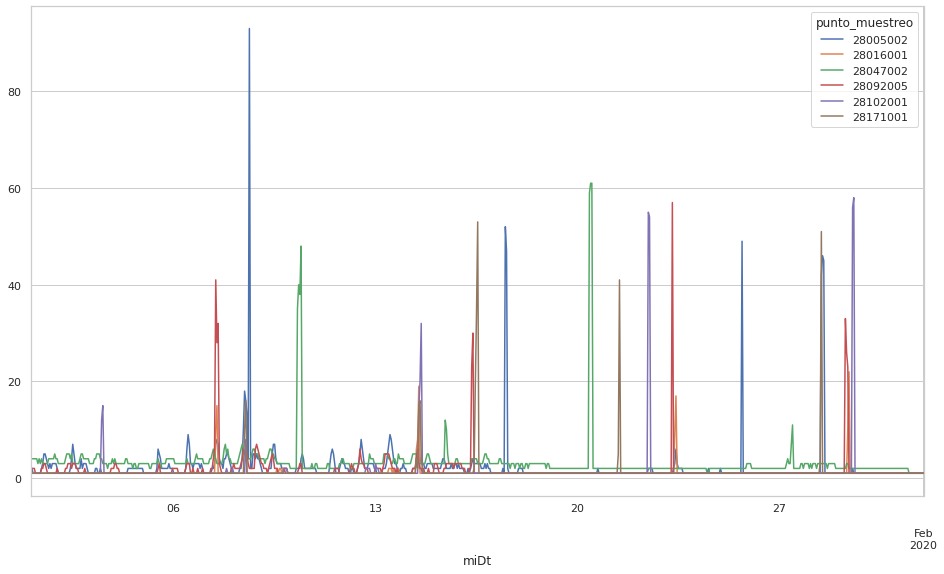

In [75]:
df1['ensayo_1'].plot()

<AxesSubplot:xlabel='miDt'>

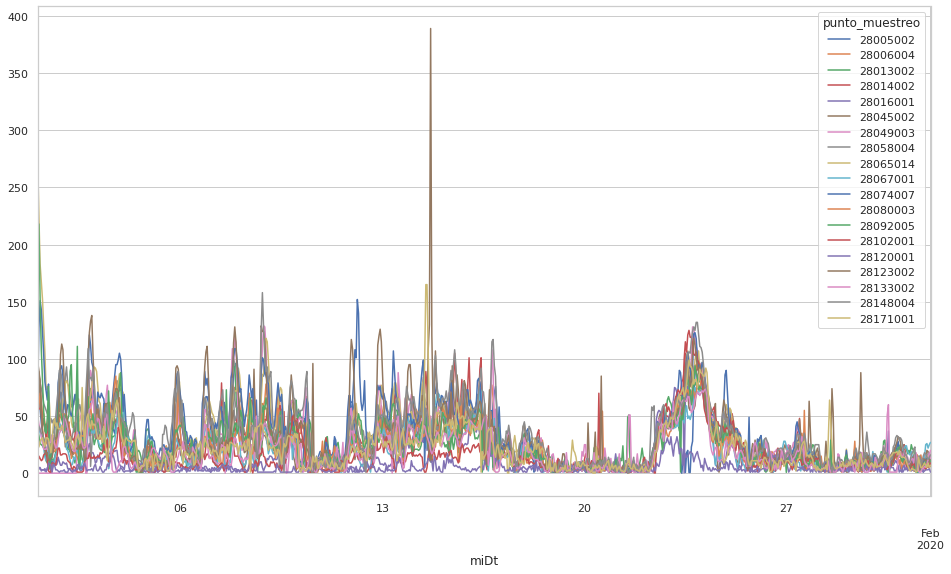

In [76]:
df1['ensayo_10'].plot()

In [77]:
df1.columns[]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (690909474.py, line 1)

In [ ]:
df2 = df1.copy()

In [ ]:
df2["day"] = df2.index.day

In [ ]:
df2.head()

In [ ]:
df2.columns

In [78]:
estaciones  = ['102_1', '120_1', '123_2', '13_2', '133_2', '14_2', '148_4',
       '16_1', '161_1', '171_1', '180_1', '45_2', '47_2', '49_3', '5_2',
       '58_4', '6_4', '65_14', '67_1', '7_4', '74_7', '80_3', '9_1',
       '92_5']

In [79]:
new_col

Index(['ensayo_1', 'ensayo_6', 'ensayo_7', 'ensayo_8', 'ensayo_9', 'ensayo_10',
       'ensayo_12', 'ensayo_14', 'ensayo_20', 'ensayo_30', 'ensayo_42',
       'ensayo_44'],
      dtype='object')

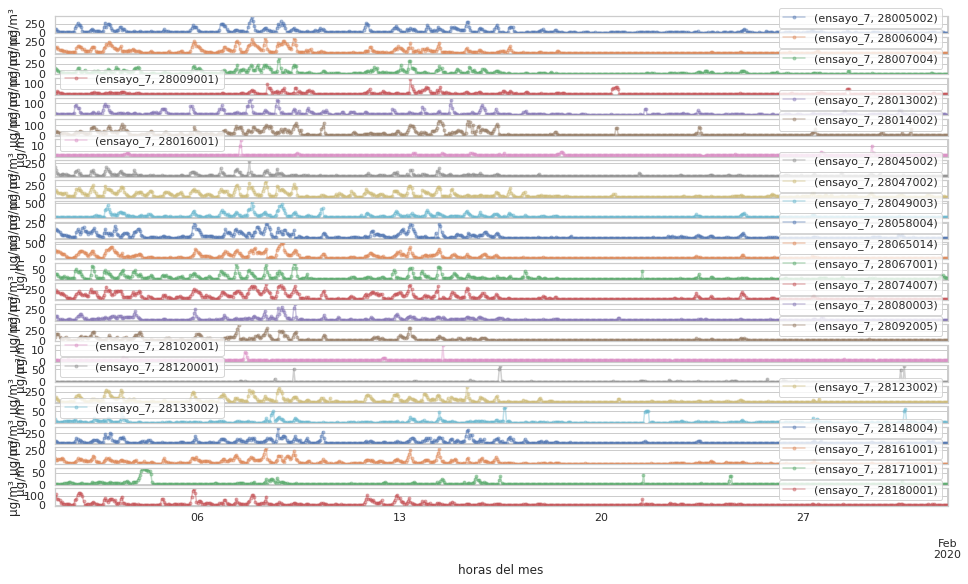

In [80]:
col_graf = ['ensayo_7'] 
ejes = df1[col_graf].plot(marker='.', alpha=0.4,subplots=True)
for eje in ejes:
    eje.set_ylabel('µg/m³')
    eje.set_xlabel('horas del mes')

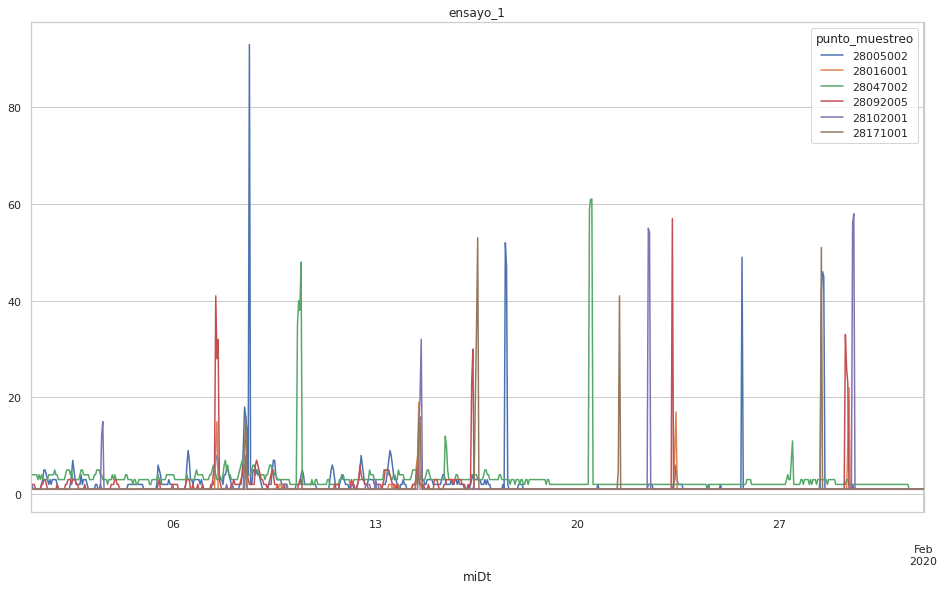

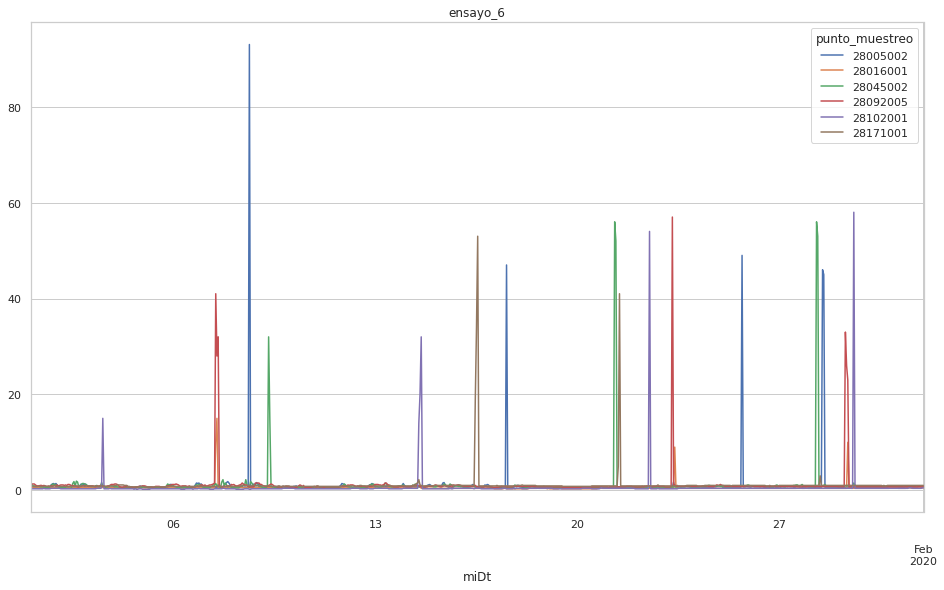

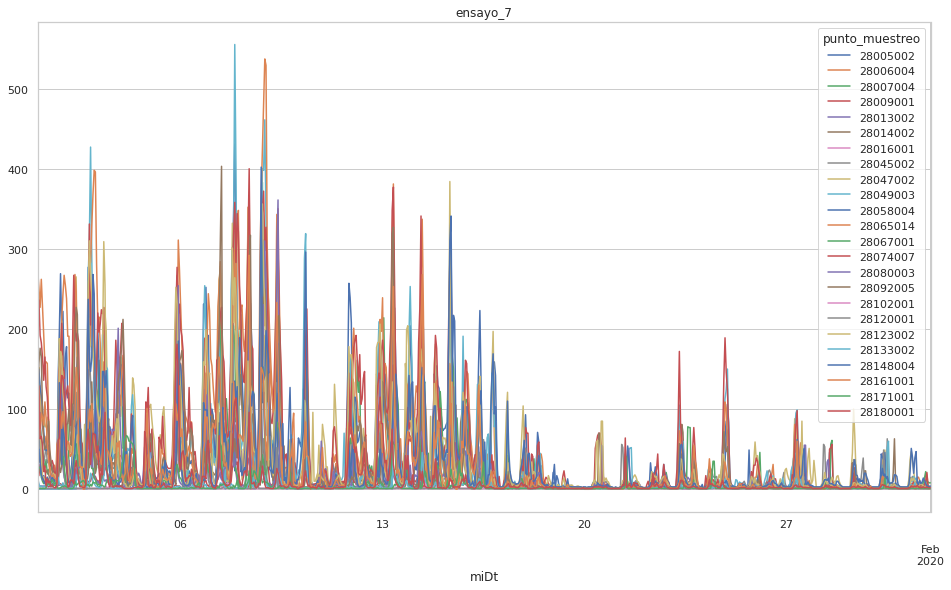

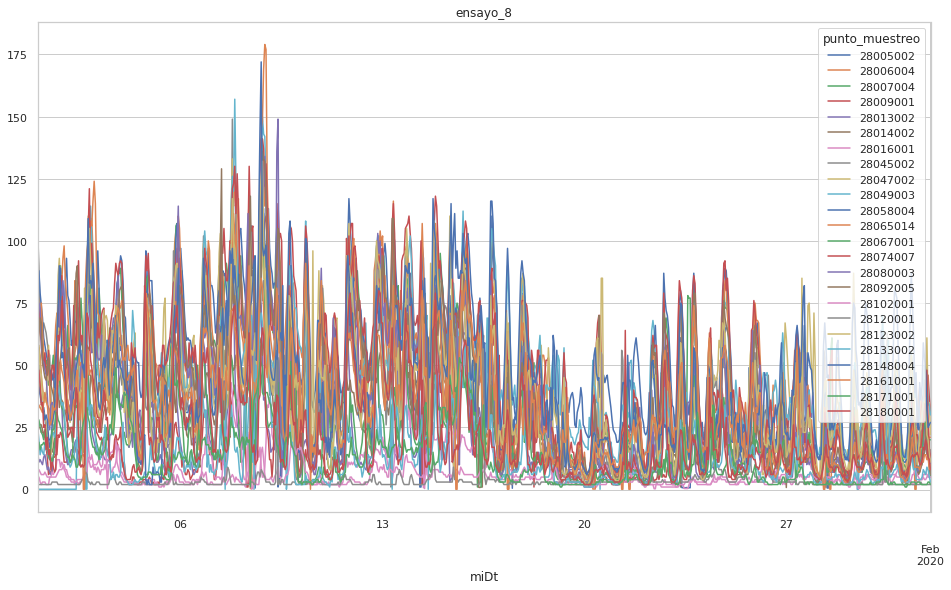

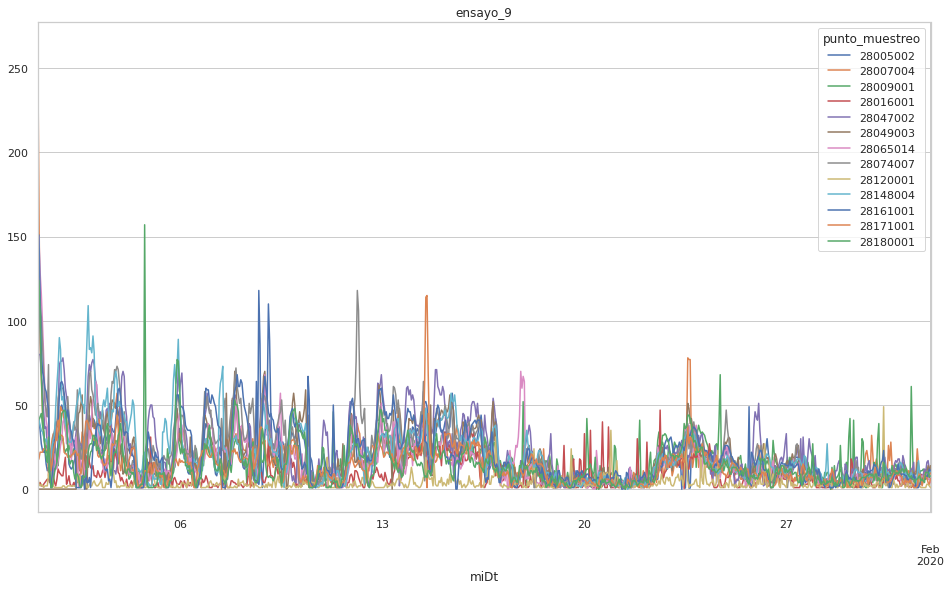

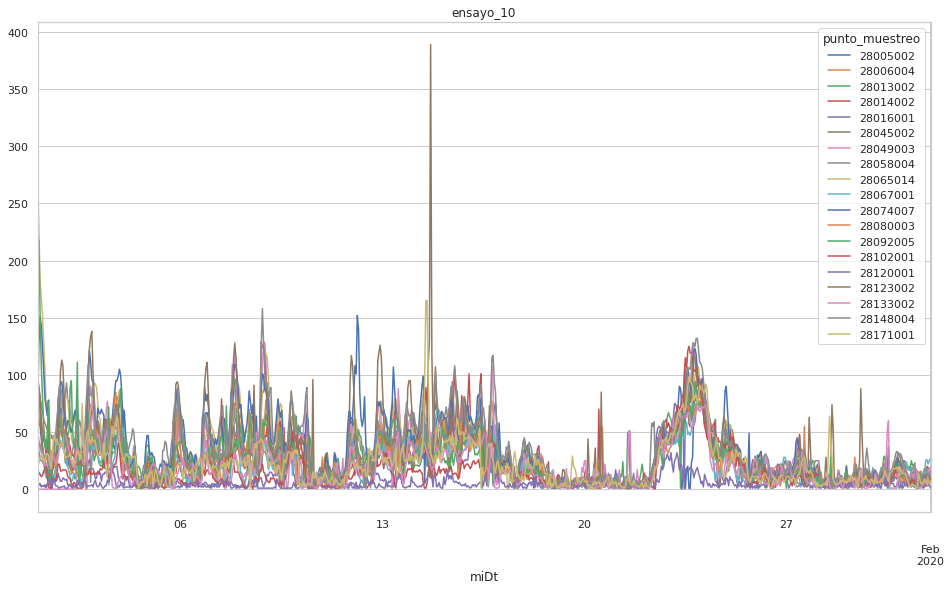

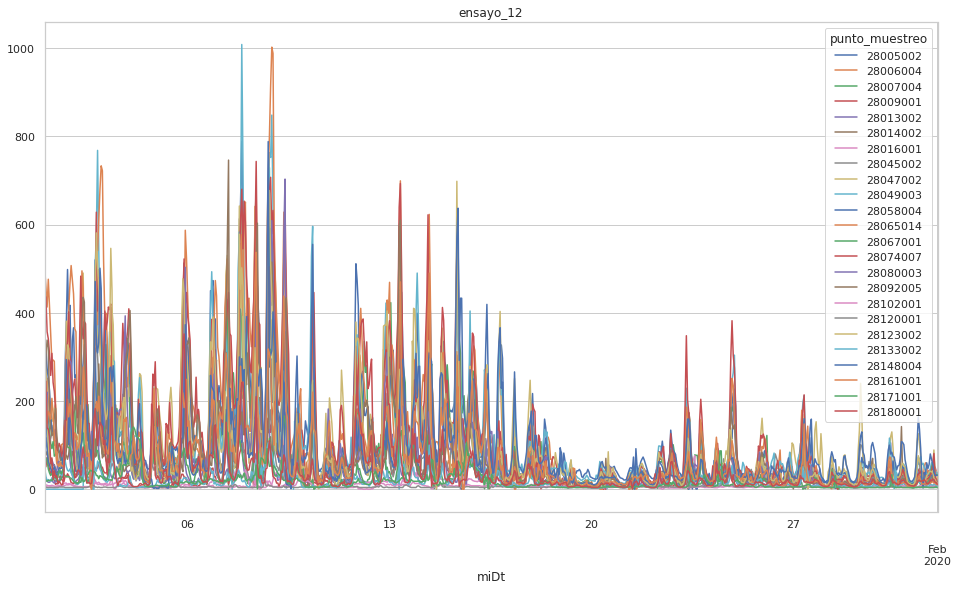

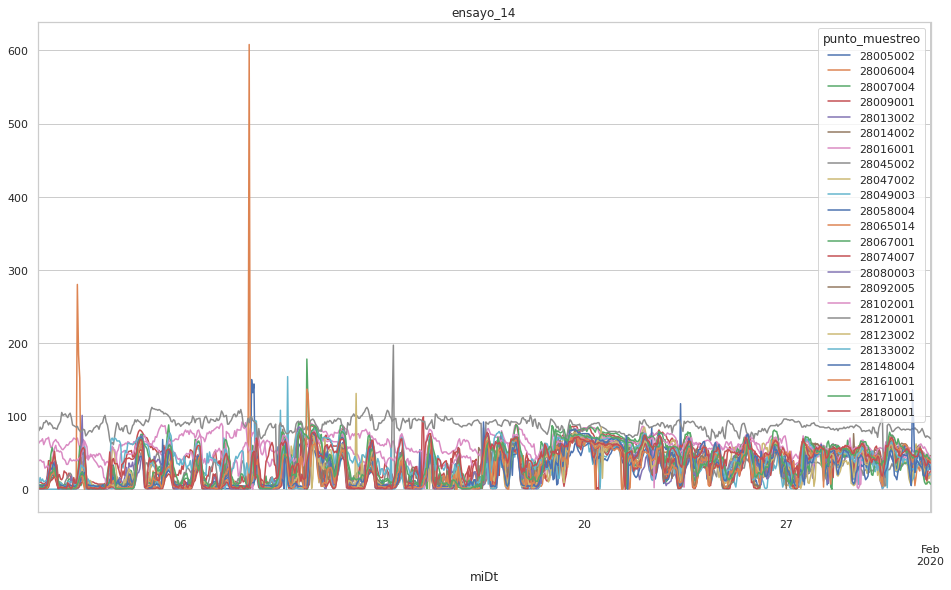

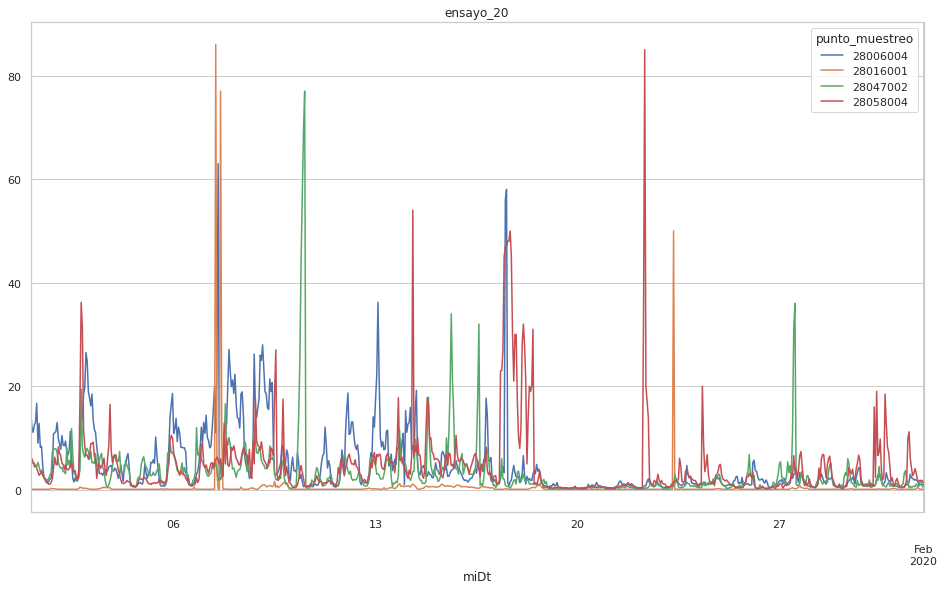

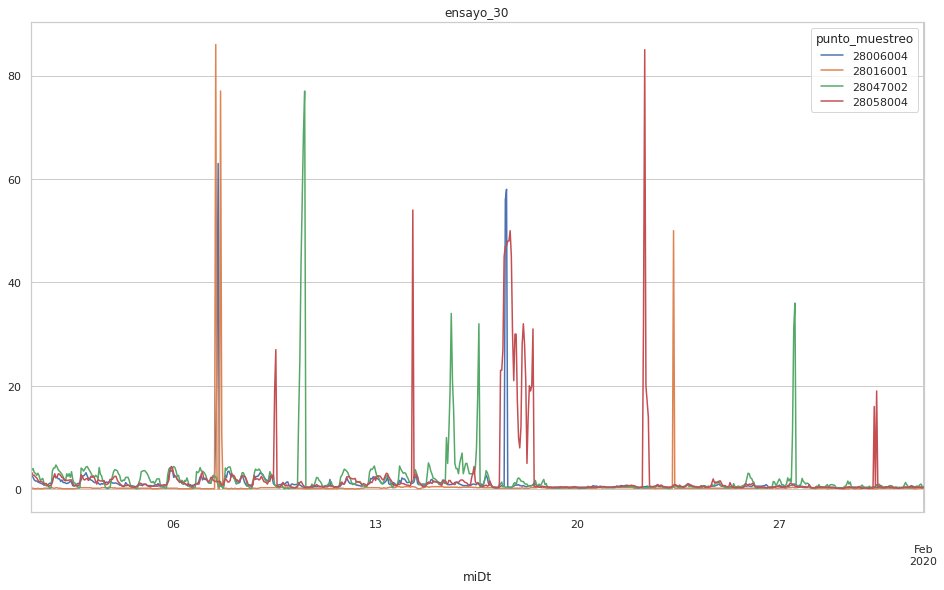

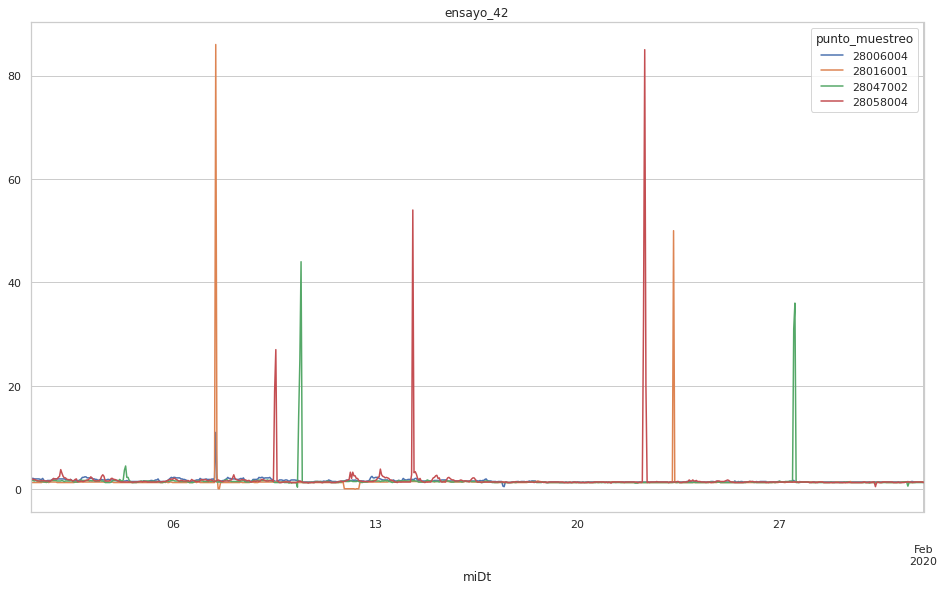

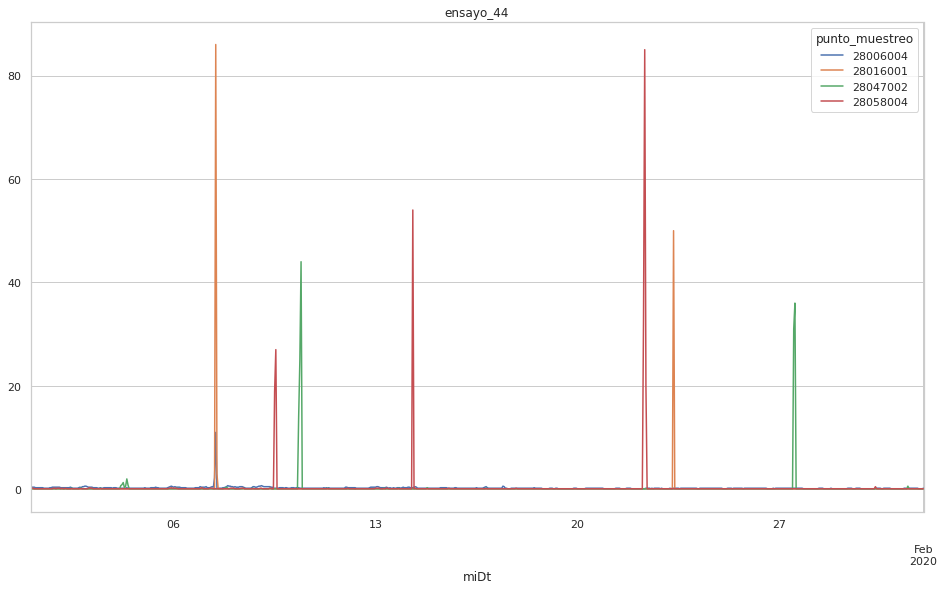

In [81]:
for i in new_col:
    df1[f'{i}'].plot(title = i)

ensayo en otros archivos 

In [82]:
con_a2021 = os.listdir('../data/2_cm_ca/2020')
con_a2021

['2020_01.csv',
 '2020_02.csv',
 '2020_03.csv',
 '2020_04.csv',
 '2020_05.csv',
 '2020_06.csv',
 '2020_07.csv',
 '2020_08.csv',
 '2020_09.csv',
 '2020_10.csv',
 '2020_11.csv',
 '2020_12.csv']

In [83]:
df_duplicado = pd.read_csv('../data/2_cm_ca/2020/2020_01.csv', sep = ';')
df_duplicado.head(1)

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,102,1,1,28102001_1_38,2020,1,1,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V


In [84]:
cdat.ley_orden('../data/2_cm_ca/2020/2020_01.csv', 'cm2020_1_mod.csv')
df_duplicado_manipulado =  pd.read_csv('../data/modificados/cm2020_1_mod.csv')

../data/2_cm_ca/2020/2020_01.csv  modificado y guadado corectamente en ../data/modificados/cm2020_1_mod.csv


In [85]:
df_duplicado_manipulado.head()

,Unnamed: 0,ensayo_1,ensayo_1.1,ensayo_1.2,ensayo_1.3,ensayo_1.4,ensayo_1.5,ensayo_10,ensayo_10.1,ensayo_10.2,...,ensayo_9.3,ensayo_9.4,ensayo_9.5,ensayo_9.6,ensayo_9.7,ensayo_9.8,ensayo_9.9,ensayo_9.10,ensayo_9.11,ensayo_9.12
0,punto_muestreo,28005002.0,28016001.0,28047002.0,28092005.0,28102001.0,28171001.0,28005002.0,28006004.0,28013002.0,...,28016001.0,28047002.0,28049003.0,28065014.0,28074007.0,28120001.0,28148004.0,28161001.0,28171001.0,28180001.0
1,miDt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 01:00:00,1.0,1.0,4.0,2.0,1.0,1.0,74.0,64.0,38.0,...,1.0,79.0,0.1,82.0,53.0,8.0,42.0,107.0,17.0,95.0
3,2020-01-01 02:00:00,2.0,1.0,4.0,2.0,1.0,1.0,71.0,85.0,33.0,...,3.0,80.0,0.1,150.0,92.0,3.0,41.0,151.0,18.0,124.0
4,2020-01-01 03:00:00,1.0,1.0,4.0,2.0,1.0,1.0,56.0,81.0,26.0,...,4.0,80.0,0.1,129.0,109.0,2.0,38.0,117.0,22.0,105.0


In [86]:
(df_duplicado_manipulado == df1).value_counts()

ValueError: Can only compare identically-labeled DataFrame objects

# Continuo via abierta para hacer dataframes independientes por ensayo


In [87]:
df_42 = df_ens[['ensayo_42']]

In [88]:
df_42.sample()

,,ensayo_42
miDt,punto_muestreo,
2020-01-03 04:00:00,28014002,NaN


In [89]:
df_42.shape

(17856, 1)

In [90]:
df_42 = pd.pivot_table(data=df_42,
               index=['miDt'],
               columns=['punto_muestreo']
              )

In [91]:
df_42.sample(3)

ensayo_42                           
punto_muestreo       28006004 28016001 28047002 28058004
miDt                                                    
2020-01-16 08:00:00       1.6      1.4      1.5      2.0
2020-01-17 13:00:00       1.4      1.3      1.3      1.4
2020-01-25 01:00:00       1.4      1.3      1.3      1.5

In [92]:
df_42.columns = df_42.columns.droplevel()

In [93]:
df_42.sample(3)

punto_muestreo,28006004,28016001,28047002,28058004
miDt,,,,
2020-01-05 18:00:00,1.6,1.4,1.5,1.6
2020-01-08 15:00:00,1.6,1.3,1.4,1.7
2020-01-09 21:00:00,1.8,1.5,1.3,1.4


In [94]:
df_42.index.name = None


In [95]:
df_42.rename_axis(columns=None, inplace= True)

In [96]:
df_42.head()

,28006004,28016001,28047002,28058004
2020-01-01 01:00:00,2.3,1.3,1.7,1.9
2020-01-01 02:00:00,2.1,1.3,1.7,2.0
2020-01-01 03:00:00,2.1,1.3,1.7,1.9
2020-01-01 04:00:00,2.0,1.3,1.6,1.9
2020-01-01 05:00:00,2.0,1.3,1.7,1.8


In [97]:
df_42= df_42.asfreq('H')

In [98]:
df_42.index

DatetimeIndex(['2020-01-01 01:00:00', '2020-01-01 02:00:00',
               '2020-01-01 03:00:00', '2020-01-01 04:00:00',
               '2020-01-01 05:00:00', '2020-01-01 06:00:00',
               '2020-01-01 07:00:00', '2020-01-01 08:00:00',
               '2020-01-01 09:00:00', '2020-01-01 10:00:00',
               ...
               '2020-01-31 15:00:00', '2020-01-31 16:00:00',
               '2020-01-31 17:00:00', '2020-01-31 18:00:00',
               '2020-01-31 19:00:00', '2020-01-31 20:00:00',
               '2020-01-31 21:00:00', '2020-01-31 22:00:00',
               '2020-01-31 23:00:00', '2020-02-01 00:00:00'],
              dtype='datetime64[ns]', length=744, freq='H')

In [99]:
df_42.shape

(744, 4)

In [100]:
df_42

,28006004,28016001,28047002,28058004
2020-01-01 01:00:00,2.3,1.3,1.7,1.9
2020-01-01 02:00:00,2.1,1.3,1.7,2.0
2020-01-01 03:00:00,2.1,1.3,1.7,1.9
2020-01-01 04:00:00,2.0,1.3,1.6,1.9
2020-01-01 05:00:00,2.0,1.3,1.7,1.8
...,...,...,...,...
2020-01-31 20:00:00,1.4,1.4,1.3,1.4
2020-01-31 21:00:00,1.4,1.4,1.3,1.4
2020-01-31 22:00:00,1.4,1.4,1.3,1.4
2020-01-31 23:00:00,1.4,1.4,1.3,1.4
